In [1]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.decomposition import TruncatedSVD

warnings.filterwarnings(action="ignore")
np.set_printoptions(formatter={"float_kind": lambda x: "%.2f" % x})

In [2]:
X, y = load_digits(return_X_y=True)

In [3]:
X

array([[0.00, 0.00, 5.00, ..., 0.00, 0.00, 0.00],
       [0.00, 0.00, 0.00, ..., 10.00, 0.00, 0.00],
       [0.00, 0.00, 0.00, ..., 16.00, 9.00, 0.00],
       ...,
       [0.00, 0.00, 1.00, ..., 6.00, 0.00, 0.00],
       [0.00, 0.00, 2.00, ..., 12.00, 0.00, 0.00],
       [0.00, 0.00, 10.00, ..., 12.00, 1.00, 0.00]])

In [4]:
y

array([0, 1, 2, ..., 8, 9, 8])

In [5]:
image = X[377]

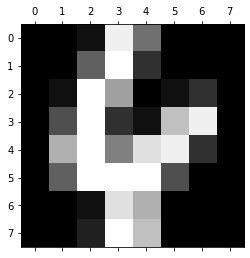

In [6]:
plt.matshow(image.reshape(8, 8), cmap="gray")

In [7]:
y[377]

4

In [8]:
svd = TruncatedSVD(n_components=2, random_state=42).fit(X)

In [9]:
b_matrix = svd.transform(X)
b_matrix

array([[45.86, -1.19],
       [55.53, 7.86],
       [55.83, 6.91],
       ...,
       [65.53, 10.66],
       [58.61, -4.91],
       [64.45, -0.46]])

In [10]:
b_matrix.shape

(1797, 2)

In [11]:
b_matrix[377]

array([50.70, 28.85])

In [12]:
m_mono = svd.inverse_transform(b_matrix[377].reshape(1, -1))
m_mono

array([[-0.00, -0.21, -1.36, 7.68, 10.65, 2.83, 1.05, 0.18, -0.00, -1.50,
        3.14, 16.05, 8.79, 1.77, 1.34, 0.22, 0.00, 0.25, 12.17, 13.14,
        2.05, 2.97, 2.54, 0.17, 0.00, 4.25, 16.24, 7.70, 3.74, 6.13,
        3.69, 0.01, 0.00, 6.88, 18.15, 13.70, 12.58, 9.60, 3.44, 0.00,
        0.05, 4.62, 15.56, 14.26, 13.56, 8.49, 2.30, 0.07, 0.03, 0.45,
        5.81, 12.08, 12.39, 4.69, 1.80, 0.23, 0.00, -0.14, -1.38, 7.77,
        11.32, 4.04, 0.93, 0.01]])

In [13]:
X[377]

array([0.00, 0.00, 1.00, 15.00, 7.00, 0.00, 0.00, 0.00, 0.00, 0.00, 6.00,
       16.00, 3.00, 0.00, 0.00, 0.00, 0.00, 1.00, 16.00, 10.00, 0.00,
       1.00, 3.00, 0.00, 0.00, 5.00, 16.00, 3.00, 1.00, 12.00, 15.00,
       0.00, 0.00, 11.00, 16.00, 8.00, 14.00, 15.00, 3.00, 0.00, 0.00,
       6.00, 16.00, 16.00, 16.00, 5.00, 0.00, 0.00, 0.00, 0.00, 1.00,
       14.00, 11.00, 0.00, 0.00, 0.00, 0.00, 0.00, 2.00, 16.00, 12.00,
       0.00, 0.00, 0.00])

In [14]:
svd.explained_variance_ratio_

array([0.03, 0.15])

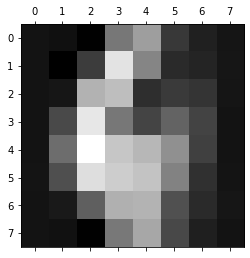

In [15]:
plt.matshow(m_mono.reshape(8, 8), cmap="gray")

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [18]:
from collections import Counter

In [19]:
counter = Counter(y_train)
counter

Counter({6: 133,
         3: 122,
         7: 128,
         1: 138,
         4: 120,
         8: 124,
         2: 118,
         5: 134,
         9: 117,
         0: 123})

In [20]:
svd = TruncatedSVD(n_components=8)

X_train_reduced = svd.fit_transform(X_train)
X_test_reduced = svd.transform(X_test)

In [21]:
X_train_reduced.shape

(1257, 8)

In [22]:
X_train.shape

(1257, 64)

In [23]:
lr = LogisticRegression().fit(X_train, y_train)

print(f"El Accuracy en entrenamiento es: {lr.score(X_train, y_train)}")
print(f"El Accuracy en prueba es: {lr.score(X_test, y_test)}")

El Accuracy en entrenamiento es: 1.0
El Accuracy en prueba es: 0.9666666666666667


In [24]:
lr_reduced = LogisticRegression().fit(X_train_reduced, y_train)

print(f"El Accuracy en entrenamiento es: {lr_reduced.score(X_train_reduced, y_train)}")
print(f"El Accuracy en prueba es: {lr_reduced.score(X_test_reduced, y_test)}")

El Accuracy en entrenamiento es: 0.9101034208432777
El Accuracy en prueba es: 0.8685185185185185


In [25]:
lr = Pipeline(steps=[("svd", TruncatedSVD(n_components=8)),
                     ("logistic_regression", LogisticRegression())])

lr.fit(X_train, y_train)

Pipeline(steps=[('svd', TruncatedSVD(n_components=8)),
                ('logistic_regression', LogisticRegression())])

In [26]:
print(f"El Accuracy en entrenamiento es: {lr.score(X_train, y_train)}")
print(f"El Accuracy en prueba es: {lr.score(X_test, y_test)}")

El Accuracy en entrenamiento es: 0.9108989657915673
El Accuracy en prueba es: 0.8703703703703703


In [27]:
from sklearn.model_selection import GridSearchCV

In [28]:
lr = Pipeline(steps=[("svd", TruncatedSVD(n_components=8)),
                     ("logistic_regression", LogisticRegression())])

params = {
    'logistic_regression__penalty': ["l1", "l2"],
    'svd__n_components': [8, 10, 20]
}

lr_cv = GridSearchCV(estimator=lr, param_grid=params, scoring="accuracy", cv=3, n_jobs=-1)

lr_cv.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('svd', TruncatedSVD(n_components=8)),
                                       ('logistic_regression',
                                        LogisticRegression())]),
             n_jobs=-1,
             param_grid={'logistic_regression__penalty': ['l1', 'l2'],
                         'svd__n_components': [8, 10, 20]},
             scoring='accuracy')

In [29]:
lr_cv.best_params_

{'logistic_regression__penalty': 'l2', 'svd__n_components': 20}

In [30]:
lr_cv.best_score_

0.9363564041368337

In [31]:
print(f"El Accuracy en entrenamiento es: {lr_cv.score(X_train, y_train)}")
print(f"El Accuracy en prueba es: {lr_cv.score(X_test, y_test)}")

El Accuracy en entrenamiento es: 0.9976133651551312
El Accuracy en prueba es: 0.9574074074074074
